In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [2]:
df = pd.read_csv("deap_eeg_final.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Participant_id         1280 non-null   object 
 1   Trial                  1280 non-null   int64  
 2   Age                    1280 non-null   int64  
 3   Gender                 1280 non-null   object 
 4   Alpha_F3               1280 non-null   float64
 5   Beta_P4                1280 non-null   float64
 6   Theta_Cz               1280 non-null   float64
 7   Entropy_Pz             1280 non-null   float64
 8   FA_F3F4                1280 non-null   float64
 9   Happy                  1280 non-null   int64  
 10  Relaxed                1280 non-null   int64  
 11  Sad                    1280 non-null   int64  
 12  Anger                  1280 non-null   int64  
 13  Emotion_Label_Encoded  1280 non-null   int64  
dtypes: float64(5), int64(7), object(2)
memory usage: 140.1+ 

In [4]:

# 2. Replace categorical 'Gender' values
gender_mapping = {'Male': 1, 'Female': -1}
df['Gender'] = df['Gender'].map(gender_mapping)

# 3. Define features and target columns
feature_columns = ['Age', 'Gender', 'Alpha_F3', 'Beta_P4', 'Theta_Cz', 'Entropy_Pz',
                   'FA_F3F4']
target_column = 'Emotion_Label_Encoded'

# 4. Create feature matrix X and target vector y
X = df[feature_columns]
y = df[target_column]


# 5. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 6. Scale the training and testing feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 7. Apply PCA
n_components = 4
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 8. Scale PCA-transformed data to [-1, 1]
minmax_scaler = MinMaxScaler(feature_range=(-1, 1))
X_train_pca_scaled = minmax_scaler.fit_transform(X_train_pca)
X_test_pca_scaled = minmax_scaler.transform(X_test_pca)

# 9. Convert scaled PCA data back to DataFrames for easier handling
# (Note: I'm using X_train_pca_scaled and X_test_pca_scaled from your step 8)
pca_columns = [f'PCA_{i+1}' for i in range(n_components)]

X_train_final = pd.DataFrame(X_train_pca_scaled, columns=pca_columns)
X_test_final = pd.DataFrame(X_test_pca_scaled, columns=pca_columns)

# Also, reset the index for the labels (y) so they align with the new DataFrames
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

print("--- Final Training Features (X_train_final) ---")
display(X_train_final.head())

print("\n--- Final Training Labels (y_train) ---")
display(y_train.head())

--- Final Training Features (X_train_final) ---


,PCA_1,PCA_2,PCA_3,PCA_4
0,-0.933200,0.088881,-0.705293,0.301766
1,-0.916173,0.152782,-0.607637,0.114267
2,-0.613110,0.084771,-0.653156,-0.272180
3,-0.925422,0.387519,-0.524529,-0.037414
4,-0.443539,-0.607512,-0.369631,-0.215549



--- Final Training Labels (y_train) ---


0    0
1    1
2    0
3    1
4    2
Name: Emotion_Label_Encoded, dtype: int64

-----------------------------------

### for this visualization required tools are 
- matplotlib
- pylatexenc
- qiskit
- qiskit-ibm-runtime

required library is qiskit machine learning library but since it is heavy like numpy it need gcc compiler that why we have to install clang 

--- ZZ Feature Map Template ---


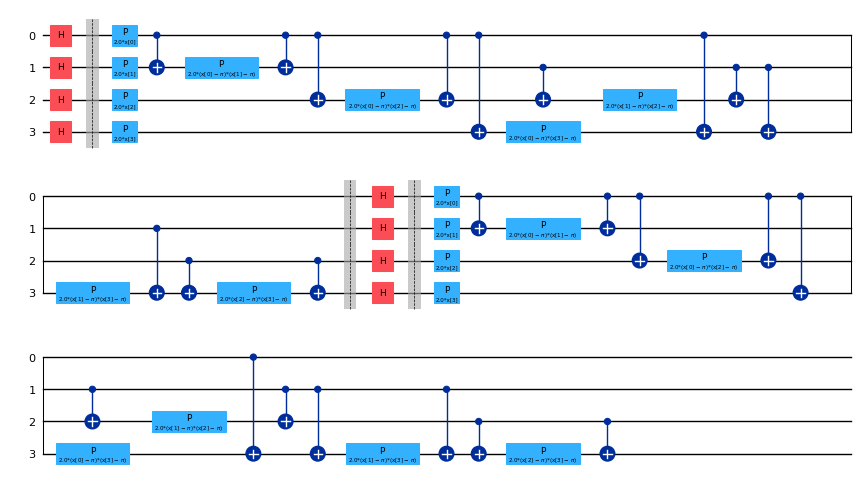

In [5]:

import qiskit
import matplotlib.pyplot as plt
from qiskit.circuit.library import zz_feature_map
import numpy as np
# Note: We have removed the 'algorithm_globals' import.

# --- 1. Define the 4-Qubit ZZFeatureMap ---
n_qubits = 4  
reps = 2      

feature_map = zz_feature_map(
    feature_dimension=n_qubits,
    reps=reps,
    entanglement='full',   
    insert_barriers=True 
)

print("--- ZZ Feature Map Template ---")
display(feature_map.draw('mpl',scale=0.5))



Features for the first training sample: [ 0.1  0.2 -0.3  0.4]

--- Circuit with First Sample's Data Bound ---


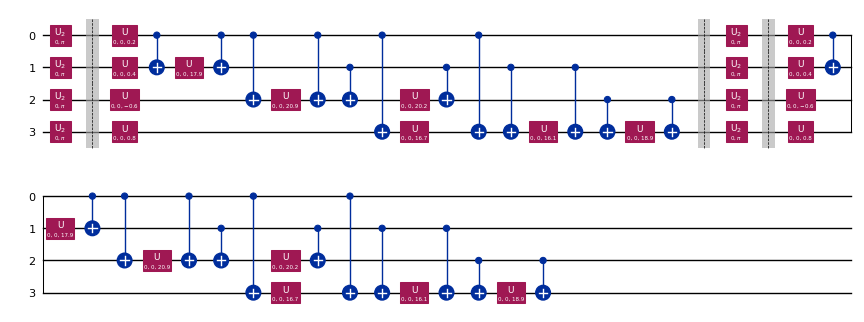

In [6]:

# --- 2. Prepare Data and Bind Parameters ---

# Let's create a dummy 4-feature data sample (replace with your X_train_final.values[0])
first_train_sample = np.array([0.1, 0.2, -0.3, 0.4]) 

print(f"\nFeatures for the first training sample: {first_train_sample}")

# "Bind" these feature values to the feature map's parameters
bound_circuit = feature_map.assign_parameters(first_train_sample)

print("\n--- Circuit with First Sample's Data Bound ---")
display(bound_circuit.decompose().draw('mpl',scale=0.5))

In [7]:

# --- 1. Setup the Qiskit Primitives (The V2 Way) ---
# Use the modern, correct V2 sampler for local simulation
from qiskit.primitives import StatevectorSampler

Creating ZZ Feature Map...
Feature map created successfully.


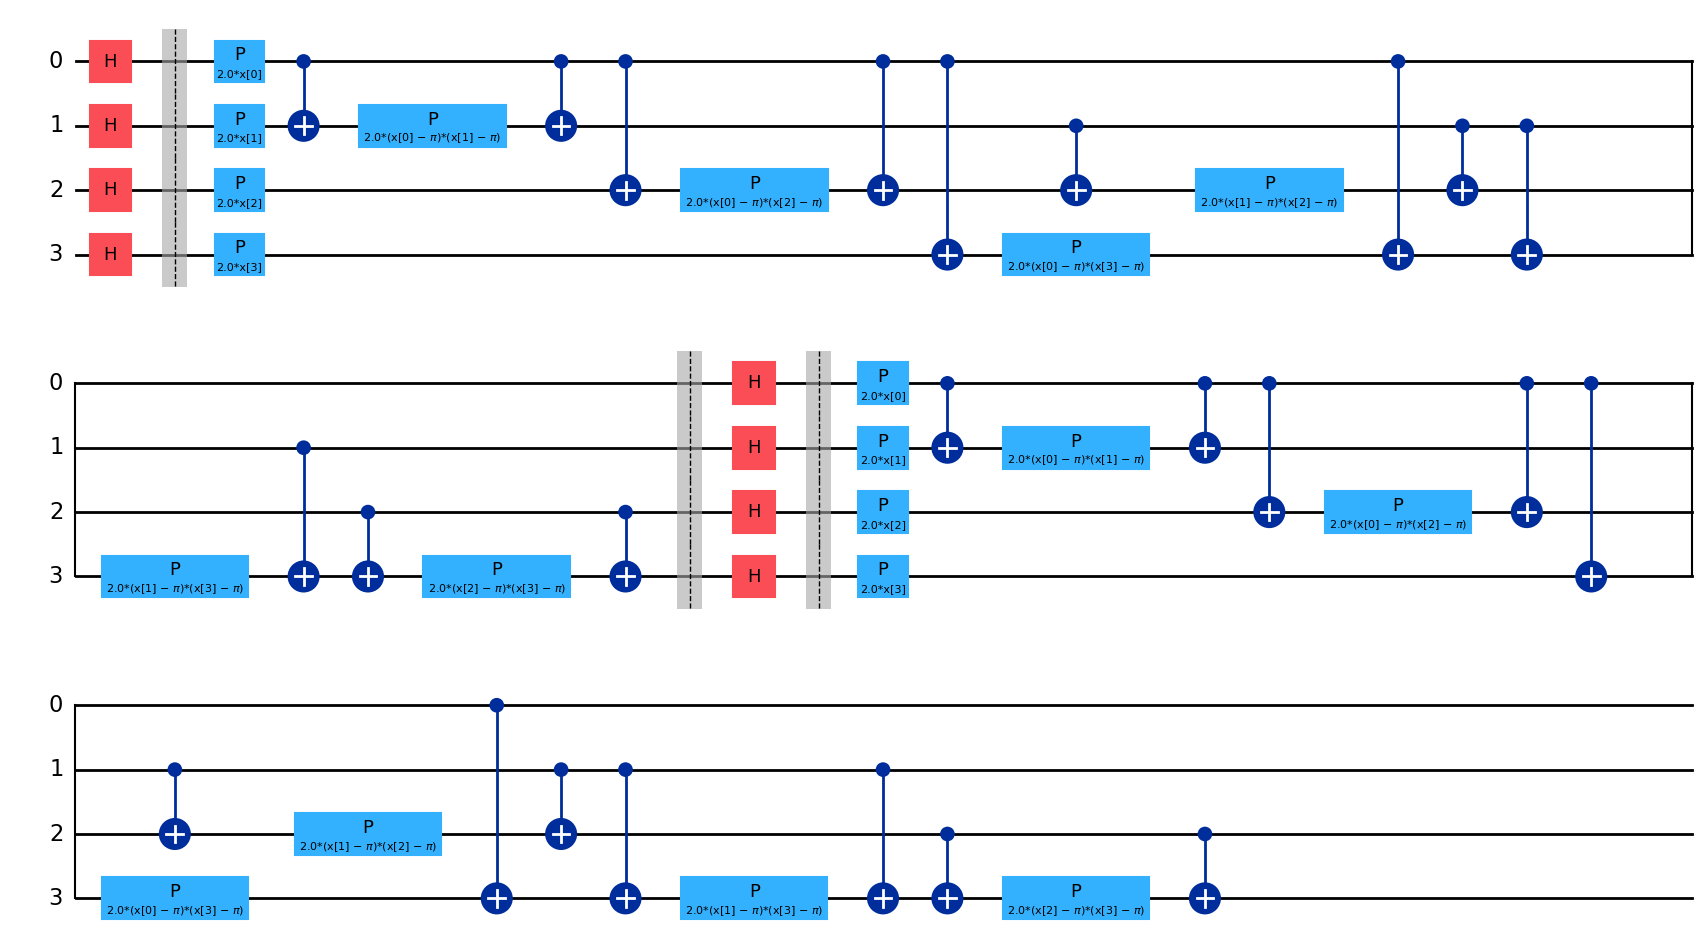

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Import the functions and classes ---
from qiskit.circuit.library import zz_feature_map  # This is the function
from sklearn.svm import SVC
from qiskit_machine_learning.kernels import FidelityQuantumKernel 

# --- 2. Create your Feature Map Circuit OBJECT ---
print("Creating ZZ Feature Map...")
# We store the circuit in a new variable called 'my_feature_map'
my_feature_map = zz_feature_map(
    feature_dimension=4,  # Your 4 PCA features
    reps=2,
    entanglement='full',
    insert_barriers=True  # <-- THIS IS THE FIX (plural 's')
)
print("Feature map created successfully.")
display(my_feature_map.draw('mpl')) # You can uncomment this to see it

In [9]:

# --- 3. Prepare Data ---
print("\nPreparing data...")
X_train_numpy = X_train_final.values
y_train_numpy = y_train.values
X_test_numpy = X_test_final.values
y_test_numpy = y_test.values



Preparing data...


In [10]:
len(X_train_numpy[:5])

5

In [11]:

# --- 4. Create the Quantum Kernel ---
print("\nCreating Quantum Kernel...")
quantum_kernel = FidelityQuantumKernel(feature_map=my_feature_map)
print("Kernel created successfully.")

# --- 5. Create and Train the Quantum SVM ---
qsvc = SVC(kernel=quantum_kernel.evaluate)

print("\nQuantum SVM created. Training...")
qsvc.fit(X_train_numpy, y_train_numpy)
print("Training complete!")

# --- 6. Test the Model and Get Accuracy ---
print("\nTesting model accuracy...")
test_accuracy = qsvc.score(X_test_numpy, y_test_numpy)
print(f"Quantum SVM Test Accuracy: {test_accuracy * 100:.2f}%")


Creating Quantum Kernel...
Kernel created successfully.

Quantum SVM created. Training...
Training complete!

Testing model accuracy...
Quantum SVM Test Accuracy: 48.83%


In [12]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = qsvc.predict(X_test_numpy)
print(confusion_matrix(y_test_numpy, y_pred))
print(classification_report(y_test_numpy, y_pred))


[[  8  42   2   0]
 [  2 101  10   0]
 [  4  35  15   0]
 [  1  34   1   1]]
              precision    recall  f1-score   support

           0       0.53      0.15      0.24        52
           1       0.48      0.89      0.62       113
           2       0.54      0.28      0.37        54
           3       1.00      0.03      0.05        37

    accuracy                           0.49       256
   macro avg       0.64      0.34      0.32       256
weighted avg       0.58      0.49      0.41       256



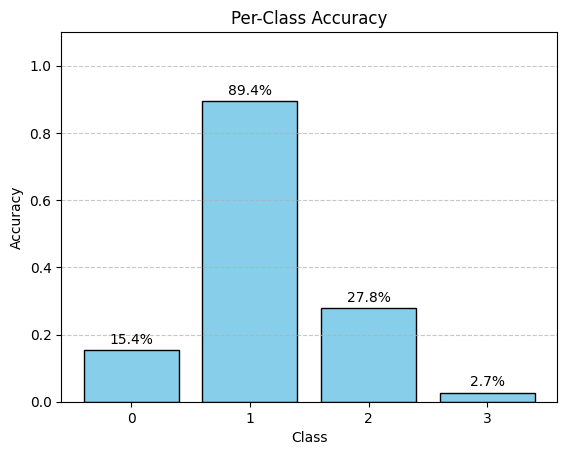

In [13]:
import numpy as np
import matplotlib.pyplot as plt

classes = [0, 1, 2, 3]
acc_per_class = [np.mean(y_pred[y_test == c] == c) for c in classes]

plt.bar(classes, acc_per_class, color='skyblue', edgecolor='black')
for i, acc in enumerate(acc_per_class):
    plt.text(i, acc + 0.02, f"{acc*100:.1f}%", ha='center')
plt.ylim(0, 1.1)
plt.xticks(classes)
plt.xlabel("Class")
plt.ylabel("Accuracy")
plt.title("Per-Class Accuracy")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
